En primer lugar importamos aquellos paquetes necesarios para el correcto funcionamiento del programa.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import newton

Veamos a continuación un pequeño ejemplo del cálculo del precio de opciones europeas.

Supongamos que existe una Opción Europea de Compra sobre Acciones de XYZ Company donde:

    - El precio actual de las acciones de XYZ Company es de $100.

    - El precio de ejercicio de la opción es de $110 y el tiempo de maduración es de 1 año.
    
    - La volatilidad del precio de las acciones es del 20% y la tasa libre de riesgo es del 5%.

Ahora, utilizando la fórmula de Black-Scholes, podemos calcular el precio de la opción europea de compra sobre las acciones de XYZ Company. Para ello, primero definiré la función que aplica Black-Scholes, fijaré los parámetros que he mencionado anteriormente y ejecutaré esta función con dichos parámetros.

In [44]:
# Defino la funcion con la formula de Black-Scholes
def black_scholes(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Defino los parametros
S0 = 100    
K = 110
T = 1
r = 0.05
sigma = 0.2

print(f"El precio del papelote es: {black_scholes(S0, K, T, r, sigma)}€")

El precio del papelote es: 6.040088129724239€


A continuación, veamos un ejemplo en el que se calcula la volatilidad a partir del precio de un producto derivado. Para ello, voy a utilizar los datos iniciales anteriores y el precio del papelote anterior donde sabemos que la volatilidad es $\sigma=0.2$. Una vez conocida la volatilidad, podrá calcularse el valor de cualquier producto derivado utilizando la función de Black-Scholes que he definido antes.

Para asegurarme de que el cálculo de la volatilidad sea correcto, volveré a aplicar la función de Black-Scholes a los parámetros que hemos fijado antes pero utilizando la sigma calculada. Deberemos obtener así el precio que hemos obtenido antes.

In [45]:
# Precio de mercado observado de la opción de compra
market_price = black_scholes(S0, K, T, r, sigma)

# Función para encontrar la volatilidad implícita que iguala el precio teórico con el precio de mercado
def implied_volatility(sigma_guess):
    return black_scholes(S0, K, T, r, sigma_guess) - market_price

# Estimación inicial de la volatilidad
initial_guess = 0.1

# Calculamos la volatilidad implícita utilizando el método de Newton-Raphson
implied_vol = newton(implied_volatility, initial_guess)

# Calculamos el precio de otra opción relacionada usando la volatilidad que hemos calculado
otra_opcion_precio = black_scholes(S0, K, T, r, implied_vol)

print("Volatilidad calculada:", implied_vol)
print("Precio de la opción con los parámetros anteriores y la volatilidad calculada:", otra_opcion_precio,"€")

Volatilidad calculada: 0.2000000000000001
Precio de la opción con los parámetros anteriores y la volatilidad calculada: 6.040088129724239 €


A continuación, vamos a estudiar cómo varía el precio de una opción con unos determinados valores iniciales cuando vamos variando los distintos parámetros (volatilidad $\sigma$, precio inicial $S_0$, strike $K$ y maturity $T$).

Comenzamos con la volatilidad.

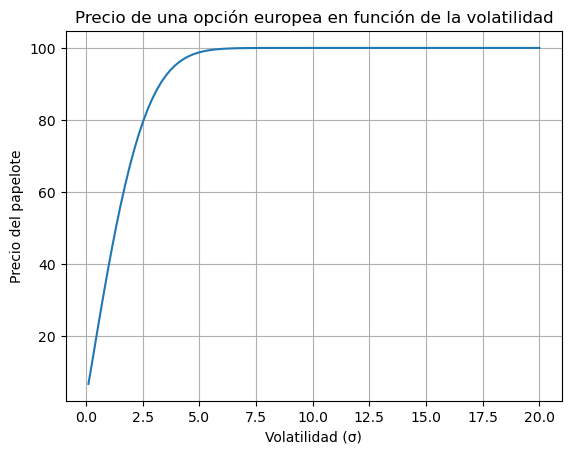

In [46]:
# Redefino los valores iniciales y rangos de los parámetros
sigma_range = np.linspace(0.1, 20, 100)     # Para cambiar el rango de sigmas hay que modificar este array
S0 = 100
K = 100
T = 1
r = 0.05

# Calculo los precios de las opciones para cada valor de sigma
precios_opcion = [black_scholes(S0, K, T, r, sigma) for sigma in sigma_range]

# Muestro los resultados
plt.plot(sigma_range, precios_opcion)
plt.xlabel('Volatilidad (σ)')
plt.ylabel('Precio del papelote')
plt.title('Precio de una opción europea en función de la volatilidad')
plt.grid(True)
plt.show()

Este resultado indica que cuanto mayor es la volatilidad, mayor es el precio de la opción (o papelote). Recordemos que la volatilidad es un indicador del grado de incertidumbre en el mercado financiero (a mayor volatilidad, mayor incertidumbre).

El resultado anterior parece indicar que los inversores están dispuestos a pagar más por una opción cuando hay más incertidumbre. Es decir, están dispuestos a pagar una prima más alta por opciones que les brinden protección contra movimientos adversos en el precio del activo subyacente. Donde prima es el precio que el comprador de la opción paga al vendedor de la opción.

Veamos cómo varía el precio del papelote cuando cambia el precio inicial $S_0$.

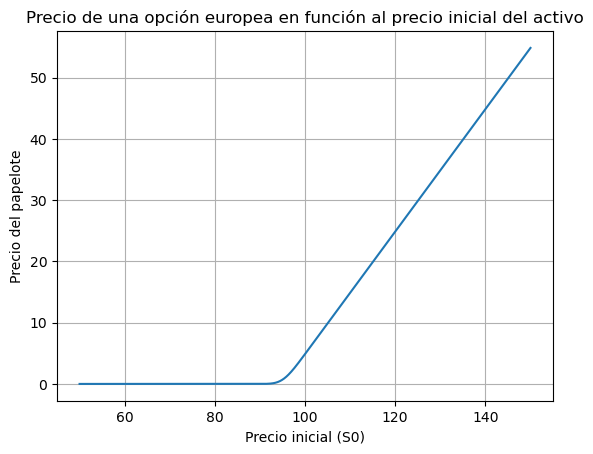

In [47]:
# Redefino los valores iniciales y rangos de los parámetros
sigma = 0.02
S0_range = np.linspace(50, 150, 1000)     # Para cambiar el rango de S0 hay que modificar este array
K = 100
T = 1
r = 0.05

# Calculo los precios de las opciones para cada valor de sigma
precios_opcion = [black_scholes(S0, K, T, r, sigma) for S0 in S0_range]

# Muestro los resultados
plt.plot(S0_range, precios_opcion)
plt.xlabel('Precio inicial (S0)')
plt.ylabel('Precio del papelote')
plt.title('Precio de una opción europea en función al precio inicial del activo')
plt.grid(True)
plt.show()

Como podemos observar en la gráfica anterior, un aumento del precio inicial del activo subyacente supone un aumento del precio de la opción. Esto era lo esperado pues en la fórmula del valor del activo, $S_0$ aparece multiplicando a un valor que siempre será mayor o igual a 0, es decir, positivo.

$$

e^{-rt} \int_{-\infty}^{+\infty} {S_0 f(e^{(r-\frac{\sigma^2}{2}) t + x \sigma \sqrt{t}}) e^{-\frac{x^2}{2}}/(2 \pi)^{\frac{1}{2}}} \, dx

$$

A la hora de interpretarlo desde el punto de vista económico, fijado un valor para $K$, un aumento en el precio inicial del activo ($S_0$) puede interpretarse como un aumento "indirecto" en el valor del activo subyacente. Cuando el valor del activo subyacente es más alto que el precio al que nos ofrecen comprarlo en un futuro ($K$), la opción tiene un mayor valor intrínseco, es por ello que los inversores estarían dispuestos a pagar más por una opción cuando el precio inicial del activo aumenta pues esta tiene un mayor potencial de beneficio.

Por otro lado, cuando el precio inicial del activo subyacente es mucho menor que el precio al que nos ofrecen comprarlo en un futuro ($K$), el valor de la opción disminuye drásticamente pues es más improbable que tengas la probabilidad de ejercer tu derecho de compra.

En general, en la variación del precio de la opción según aumenta el precio inicial del activo ($S_0$) está muy ligado al valor fijado para $K$.

A continuación, vemos qué sucede cuando $K$ varía.

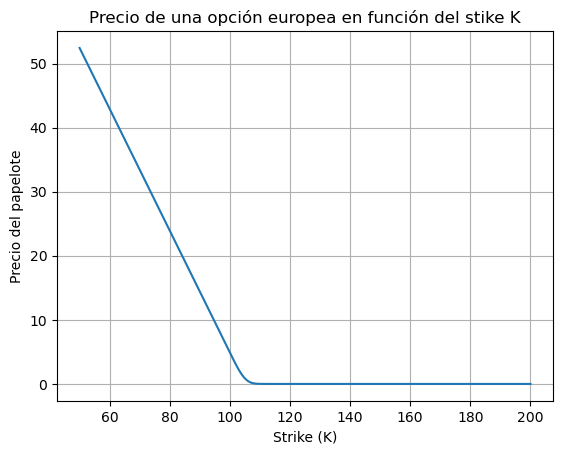

In [48]:
# Redefino los valores iniciales y rangos de los parámetros
sigma = 0.02
S0 = 100     # Para cambiar el rango de S0 hay que modificar este array
K_range = np.linspace(50, 200, 1000)     # Para cambiar el rango de K hay que modificar este array
T = 1
r = 0.05

# Calculo los precios de las opciones para cada valor de sigma
precios_opcion = [black_scholes(S0, K, T, r, sigma) for K in K_range]

# Muestro los resultados
plt.plot(K_range, precios_opcion)
plt.xlabel('Strike (K)')
plt.ylabel('Precio del papelote')
plt.title('Precio de una opción europea en función del stike K')
plt.grid(True)
plt.show()

Como se puede observar, en esta gráfica hay un punto que juega un valor crucial y que es el precio inicial del activo subyacente $S_0$. Jugueteando con el código anterior y variando el valor de $S_0$ podemos observar que según $K$ disminuye, el precio de la opción aumenta. Esto es muy coherente a nivel económico ya que si me ofrecen el derecho de comprar (pasado un tiempo) el activo $S$ a un precio $K << S_0$, la probabilidad de que el precio del activo $S$ decaiga tanto en el periodo de tiempo fijado es menor que la probabilidad de que decaiga un valor $G$ donde $S_0>G>K$.

Por otro lado, en cuanto el valor de $K$ supera $S_0$, el precio de nuestro papelote decae mucho más rápido segun aumenta $K$. Lo cual, sigue teniendo sentido pues las posibilidades de que el precio del activo subyacente crezca tanto como para que me resulte rentable comprar (pasado un tiempo fijado) se vuelven más pequeñas según aumenta el precio que me ofrecen de compra, $K$.

Al igual que en la gráfica sobre la variación del precio de la opción según el precio inicial ($S_0$), en esta última gráfica volvemos a ver lo ligados que están los parámetros $K$ y $S_0$.

Finalmente, veamos cómo varía el precio de la opción según el valor de $T$.

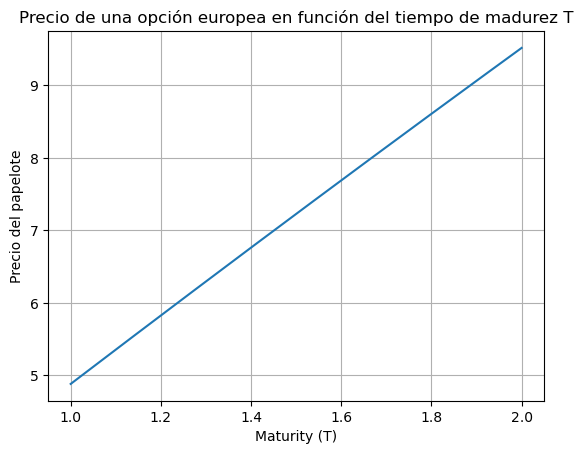

In [49]:
# Redefino los valores iniciales y rangos de los parámetros
sigma = 0.02
S0 = 100
K = 100
T_range = np.linspace(1, 2, 1000)     # Para cambiar el rango de T hay que modificar este array
r = 0.05

# Calculo los precios de las opciones para cada valor de sigma
precios_opcion = [black_scholes(S0, K, T, r, sigma) for T in T_range]

# Muestro los resultados
plt.plot(T_range, precios_opcion)
plt.xlabel('Maturity (T)')
plt.ylabel('Precio del papelote')
plt.title('Precio de una opción europea en función del tiempo de madurez T')
plt.grid(True)
plt.show()

Podemos observar en la gráfica anterior que según aumenta el tiempo de maduración (T), aumenta el precio de la opción. Desde el punto de vista económico, este aumento de precio en la opción se podría deber a que un tiempo de maduración mayor proporciona más oportunidades para que el precio del activo subyacente se mueva a favor del titular de la opción.